In [120]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch # for creating dendrogram
from sklearn.cluster import AgglomerativeClustering

wines = pd.read_csv("C:\\Users\\kp\\Pictures\\Assignments\\PCA\\wine.csv",header=0)

# Considering only numerical data 
features_wines = wines.iloc[:,1:]
# Normalizing the numerical data 
features_wines_normal = scale(features_wines)

#Taking First Three Principal Components for our further problem solving
pca = PCA(n_components = 3)
pca_wines = pca.fit_transform(features_wines_normal)

print("PCA Component Values: \n",pca.components_)

PCA Component Values: 
 [[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]
 [-0.20738262  0.08901289  0.6262239   0.61208035  0.13075693  0.14617896
   0.1506819   0.17036816  0.14945431 -0.13730621  0.08522192  0.16600459
  -0.12674592]]


In [121]:
# The amount of variance that each PCA explains is 
info = pca.explained_variance_ratio_
info
#Each component is of n-dimensional vector
#pca.components_[0]

array([0.36198848, 0.1920749 , 0.11123631])

In [122]:
# Cumulative variance 
cumulative_info = np.cumsum(np.round(info,decimals = 4)*100)
cumulative_info

array([36.2 , 55.41, 66.53])

In [123]:
#Transformed PCA Component Values
pca_features=pd.DataFrame(data = pca_wines, columns = ['PC1','PC2','PC3'])
pca_df = pd.concat([pca_features, wines[['Type']]], axis = 1)
pca_df 

,PC1,PC2,PC3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


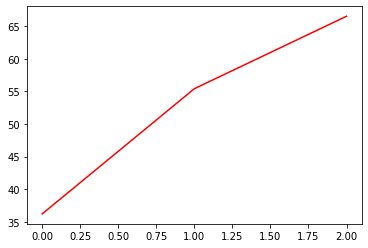

In [124]:
# Variance plot for PCA components obtained 
plt.plot(cumulative_info,color="red")

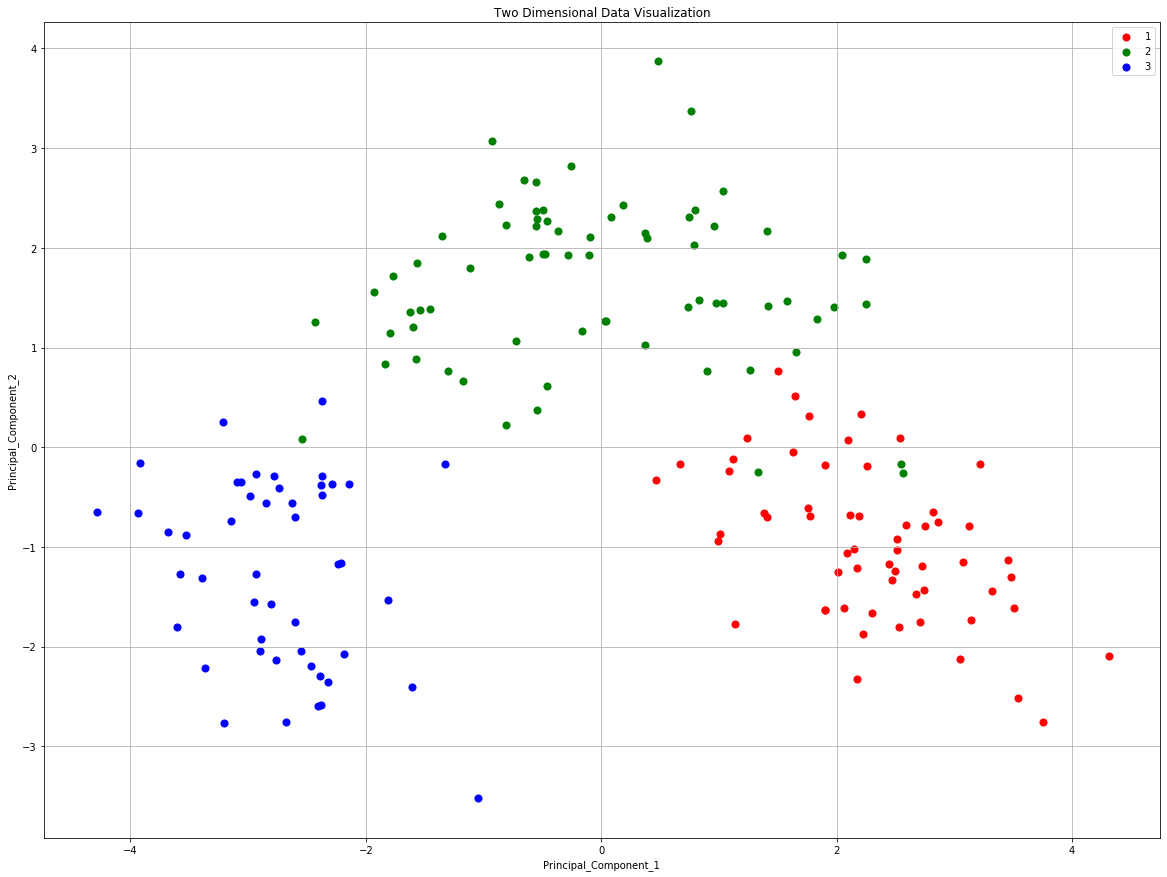

In [125]:
# Plot between PCA1 and PCA2 
fig = plt.figure(figsize = (20,15))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal_Component_1')
ax.set_ylabel('Principal_Component_2')
ax.set_title('Two Dimensional Data Visualization')
types = [1,2,3]
colors = ['r', 'g', 'b']
for type,color in zip(types,colors):
    indicesToKeep = pca_df['Type'] == type
    ax.scatter(pca_df.loc[indicesToKeep, 'PC1'],pca_df.loc[indicesToKeep, 'PC2'],c = color,s = 50)
ax.legend(types)
ax.grid()

In [126]:
###### screw plot or elbow curve ############
kclusters = list(range(2,11))
TWSS = [] # variable for storing total within sum of squares for each kmeans 

for i in kclusters:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pca_features)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(pca_features.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,pca_features.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

Text(0.5, 1.0, 'Screw Plot or Elbow Curve for Determining appropriate Clusters')

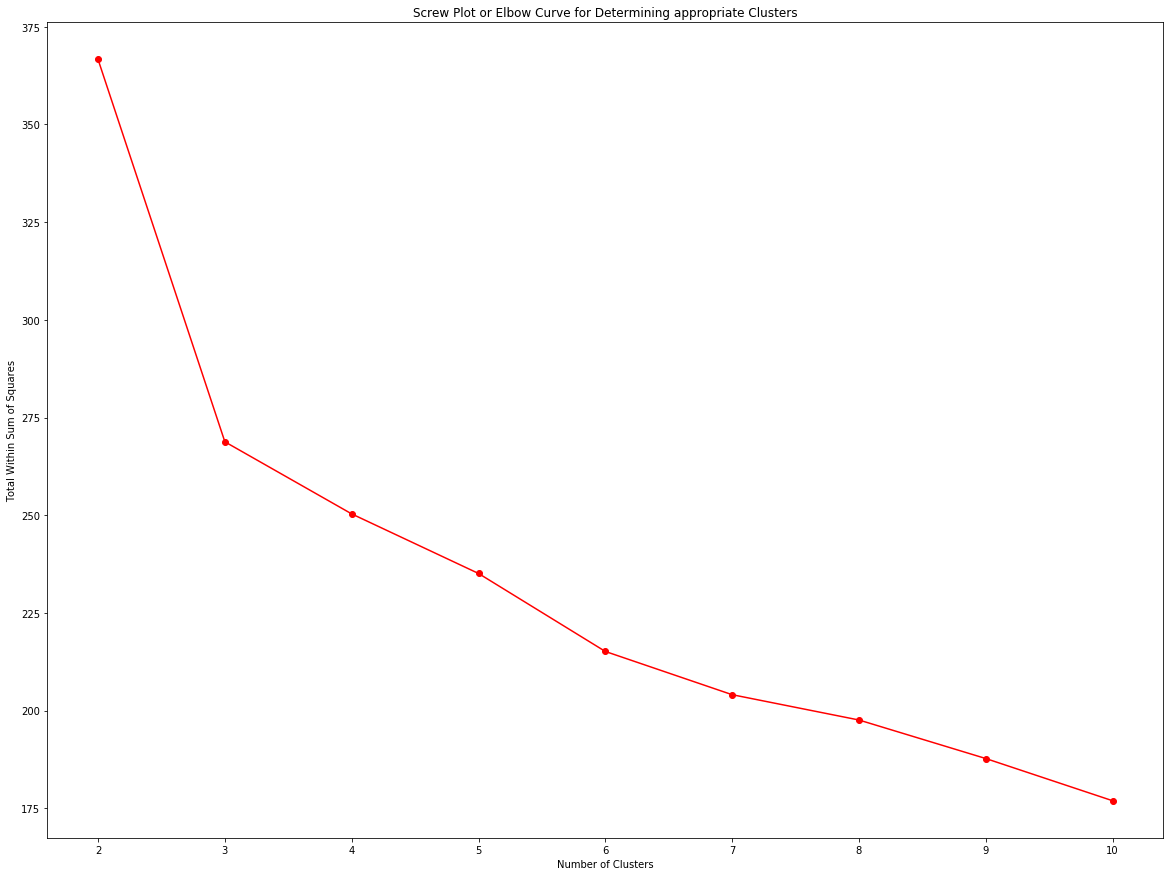

In [127]:
plt.figure(figsize=(20,15))
plt.plot(kclusters,TWSS, 'ro-');
plt.xlabel("Number of Clusters");
plt.ylabel("Total Within Sum of Squares");
plt.xticks(kclusters)
plt.title('Screw Plot or Elbow Curve for Determining appropriate Clusters')

In [128]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters
kmeans_model=KMeans(n_clusters=3)
kmeans_model.fit(pca_features)

# getting the labels of clusters assigned to each row
#kmeans_model.labels_

class_labels=pd.Series(kmeans_model.labels_)  # converting numpy array into pandas series object
pca_df['Predictions']=class_labels  # creating a  new column and assigning it to new column
pca_df.head(10)

,PC1,PC2,PC3,Type,Predictions
0,3.316751,-1.443463,-0.165739,1,1
1,2.209465,0.333393,-2.026457,1,1
2,2.516740,-1.031151,0.982819,1,1
3,3.757066,-2.756372,-0.176192,1,1
4,1.008908,-0.869831,2.026688,1,1
5,3.050254,-2.122401,-0.629396,1,1
6,2.449090,-1.174850,-0.977095,1,1
7,2.059437,-1.608963,0.146282,1,1
8,2.510874,-0.918071,-1.770969,1,1
9,2.753628,-0.789438,-0.984247,1,1


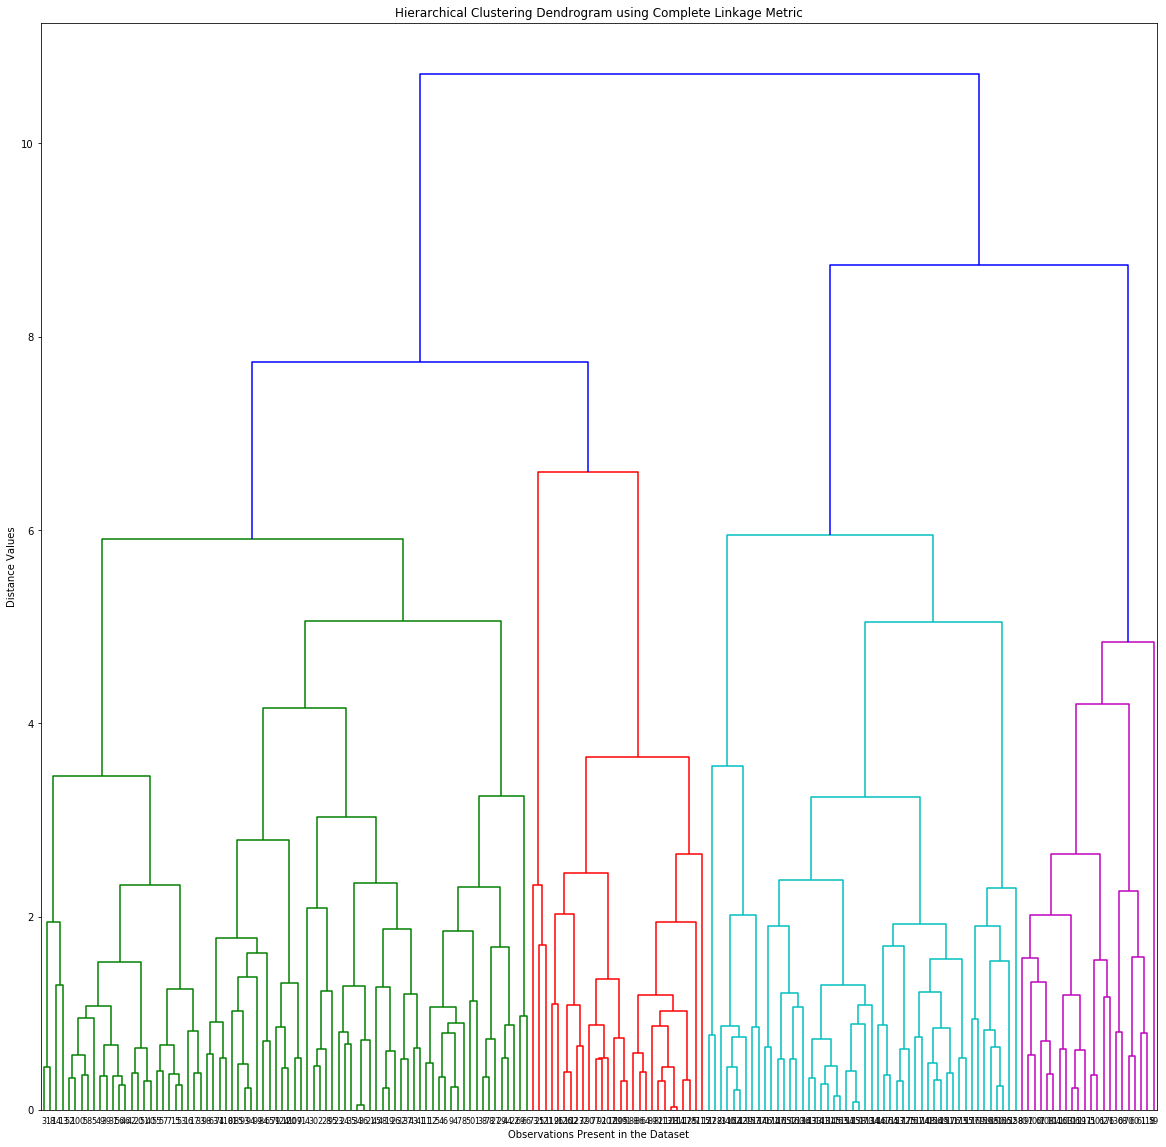

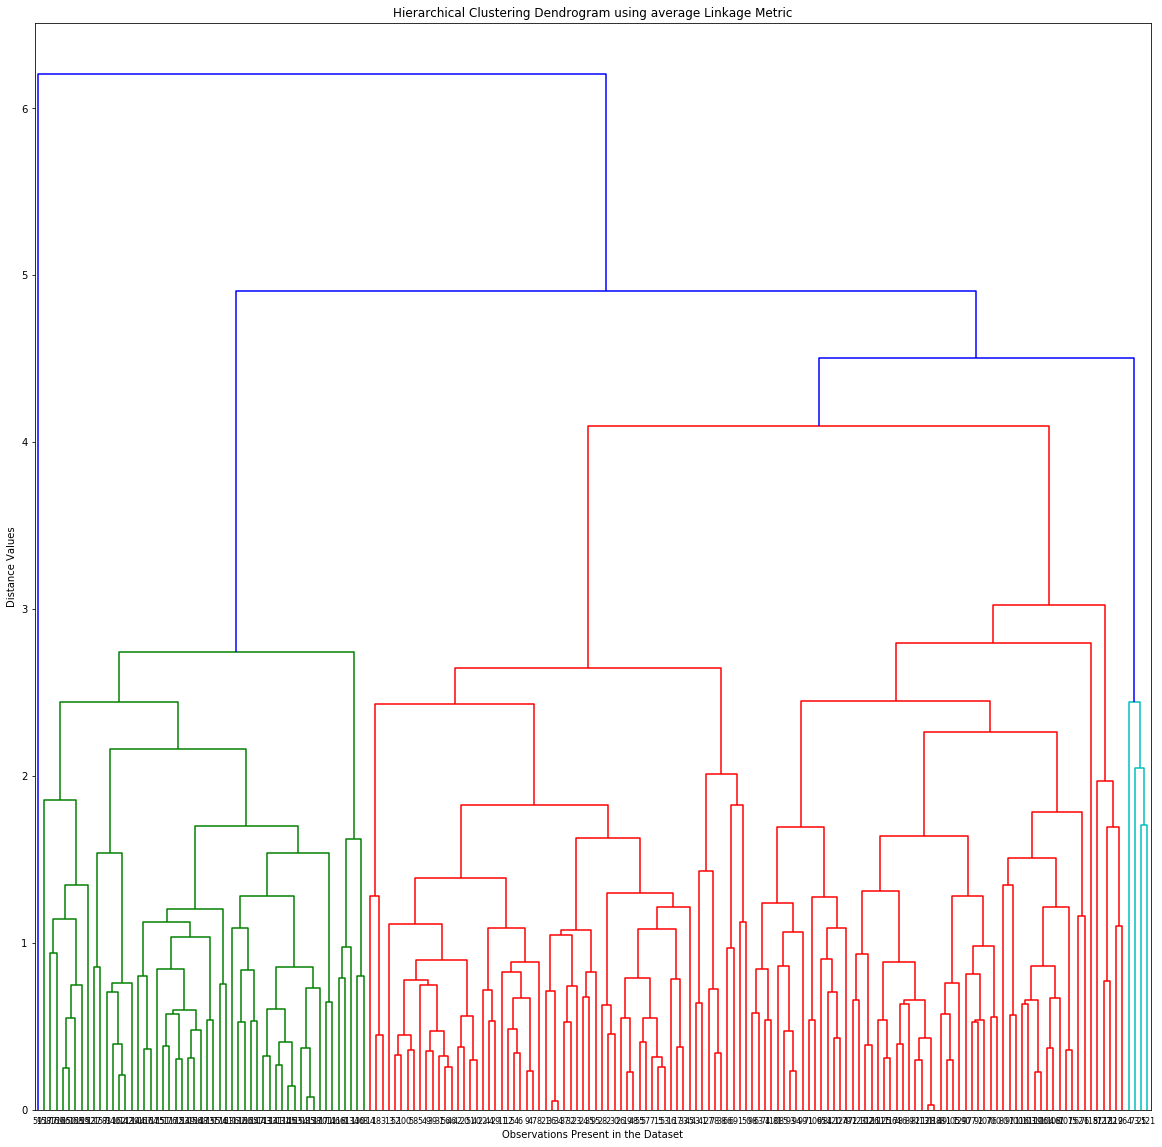

In [129]:
#########################################################Hierarchical Clustering-Dendogram-Agglomerative Clustering##############################################

#Dendogram Plot using Complete Linkage as Distance Metric
dist_complete = linkage(pca_features, method="complete",metric="euclidean",optimal_ordering=True)

plt.figure(figsize=(20, 20))
plt.title('Hierarchical Clustering Dendrogram using Complete Linkage Metric')
plt.xlabel('Observations Present in the Dataset')
plt.ylabel('Distance Values')
sch.dendrogram(dist_complete,leaf_rotation=0.0,leaf_font_size=8.0)
plt.show()

#Dendogram Plot using Average Linkage as Distance Metric
dist_average = linkage(pca_features, method="average",metric="euclidean",optimal_ordering=True)

plt.figure(figsize=(20, 20))
plt.title('Hierarchical Clustering Dendrogram using average Linkage Metric')
plt.xlabel('Observations Present in the Dataset')
plt.ylabel('Distance Values')
sch.dendrogram(dist_average,leaf_rotation=0.0,leaf_font_size=8.0)
plt.show()

#It is evident from the Dendogram Plots that the Average Linkage Distance Metric will yield us optimal Number of Clusters 
#Matching with the Number of Clusters provided in the Original Dataset rather than using other Distance Linkage metrics like
#Complete,single

In [130]:
# Applying AgglomerativeClustering by choosing 3 as clusters from the dendrogram
hierarchical_average = AgglomerativeClustering(n_clusters=3, linkage='average',affinity = "euclidean").fit(pca_features)

pca_df_hierarchical= pca_features

pca_df_hierarchical['Predictions']=pd.Series(hierarchical_average.labels_)

# creating a csv file
pca_df_hierarchical.to_csv("Wines_HierarchicalClustering.csv",encoding="utf-8")